In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape

In [2]:
tracts = gpd.GeoDataFrame.from_file('New Shapefile/NYC Tracts WGS84.shp')

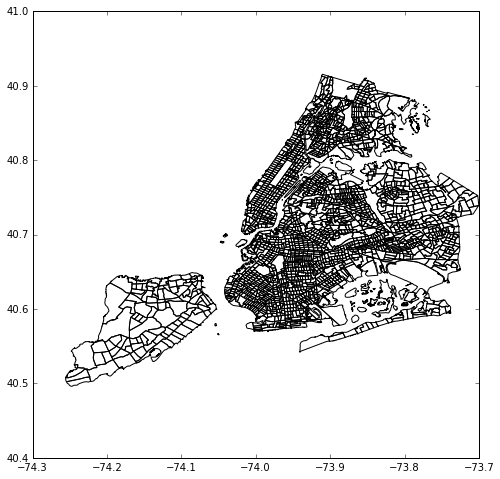

In [4]:
tracts.plot(alpha=0, figsize = (10,8))

In [5]:
tracts.head(2)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...


In [6]:
len(tracts)

2166

In [7]:
data = pd.read_csv('311_2014.csv')

C:\Users\juanpablo\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (8,17,40,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [8]:
len(data)

1836986

In [9]:
data = data.dropna(axis=0, how='any', thresh=None, subset=['Latitude', 'Longitude'], inplace=False)

In [10]:
len(data)

1674071

In [11]:
data['geometry'] = data.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)

In [12]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,geometry
0,29611713,12/31/2014 12:00:00 AM,06/05/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10019,240 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767310,-73.980141,"(40.76730974104659, -73.98014085683354)",POINT (-73.98014085683354 40.7673097410466)
1,29607489,12/31/2014 12:00:00 AM,01/22/2015 08:56:16 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11205,473 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.689558,-73.955828,"(40.68955776792481, -73.95582787970666)",POINT (-73.95582787970666 40.68955776792482)
2,29609686,12/31/2014 12:00:00 AM,12/31/2014 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10040,519 WEST 189 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.853427,-73.927961,"(40.85342657498437, -73.92796122060126)",POINT (-73.92796122060126 40.85342657498437)
3,29608954,12/31/2014 12:00:00 AM,01/03/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11373,93-35 LAMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.746479,-73.872293,"(40.74647940280815, -73.87229300887509)",POINT (-73.87229300887509 40.74647940280815)
4,29609736,12/31/2014 12:00:00 AM,06/05/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,10019,240 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767310,-73.980141,"(40.76730974104659, -73.98014085683354)",POINT (-73.98014085683354 40.7673097410466)


In [13]:
PointsGeodataframe = gpd.GeoDataFrame(data)

In [14]:
PointsGeodataframe.crs = tracts.crs

In [16]:
merged=sjoin(PointsGeodataframe, tracts, how='left', op='within')

In [17]:
merged.columns

Index([                    u'Unique Key',                   u'Created Date',
                          u'Closed Date',                         u'Agency',
                          u'Agency Name',                 u'Complaint Type',
                           u'Descriptor',                  u'Location Type',
                         u'Incident Zip',               u'Incident Address',
                          u'Street Name',                 u'Cross Street 1',
                       u'Cross Street 2',          u'Intersection Street 1',
                u'Intersection Street 2',                   u'Address Type',
                                 u'City',                       u'Landmark',
                        u'Facility Type',                         u'Status',
                             u'Due Date',         u'Resolution Description',
       u'Resolution Action Updated Date',                u'Community Board',
                              u'Borough',     u'X Coordinate (State Plane)',

In [18]:
merged['Agency'].value_counts().nlargest(10)

HPD      611444
NYPD     271143
DOT      238252
DEP      161497
DSNY     138162
DOB       87828
DPR       62353
DOHMH     52628
TLC       19622
DCA       16853
dtype: int64

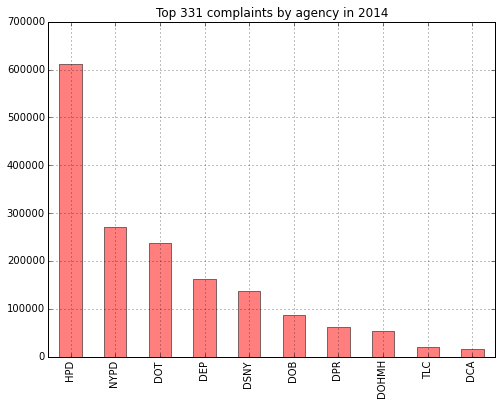

In [19]:
merged['Agency'].value_counts().nlargest(10).plot(kind='bar', grid=True, alpha=0.5, figsize=(8,6), color='red',\
                                                  title='Top 331 complaints by agency in 2014') 

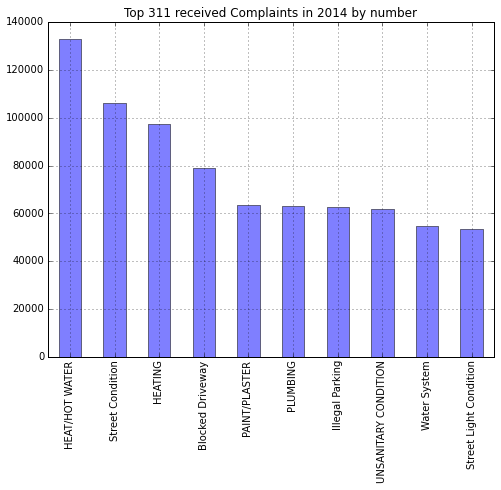

In [20]:
merged['Complaint Type'].value_counts().nlargest(10).plot(kind='bar', grid=True, alpha=0.5, figsize=(8,6), \
                                                         title="Top 311 received Complaints in 2014 by number") 

In [21]:
topct = pd.DataFrame(merged['Complaint Type'].groupby(merged['BoroCT2010']).value_counts().groupby(level=0).nlargest(1)).reset_index()

In [22]:
topct.columns = ['BoroCT2010', 'uno', 'Complaint Type', 'Count']

In [23]:
del(topct['uno'])

In [24]:
topct.head()

,BoroCT2010,Complaint Type,Count
0,1000201,HEAT/HOT WATER,68
1,1000202,HEAT/HOT WATER,61
2,1000500,Noise - Street/Sidewalk,2
3,1000600,Illegal Parking,106
4,1000700,Noise,314


In [25]:
geotopct = pd.merge(tracts, topct, on='BoroCT2010')

In [26]:
len(geotopct)

2162

In [27]:
geotopct.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,Complaint Type,Count
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...,HEAT/HOT WATER,59
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...,Street Condition,116
2,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.74119,9902.948235,"POLYGON ((-74.05974734759452 40.5938486115672,...",Street Condition,85
3,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2334190.23228,6358.386684,POLYGON ((-73.97990650235906 40.72686577300235...,Noise - Commercial,245
4,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1887288.40108,5737.356247,POLYGON ((-73.97765482727571 40.75791142377998...,Broken Muni Meter,106


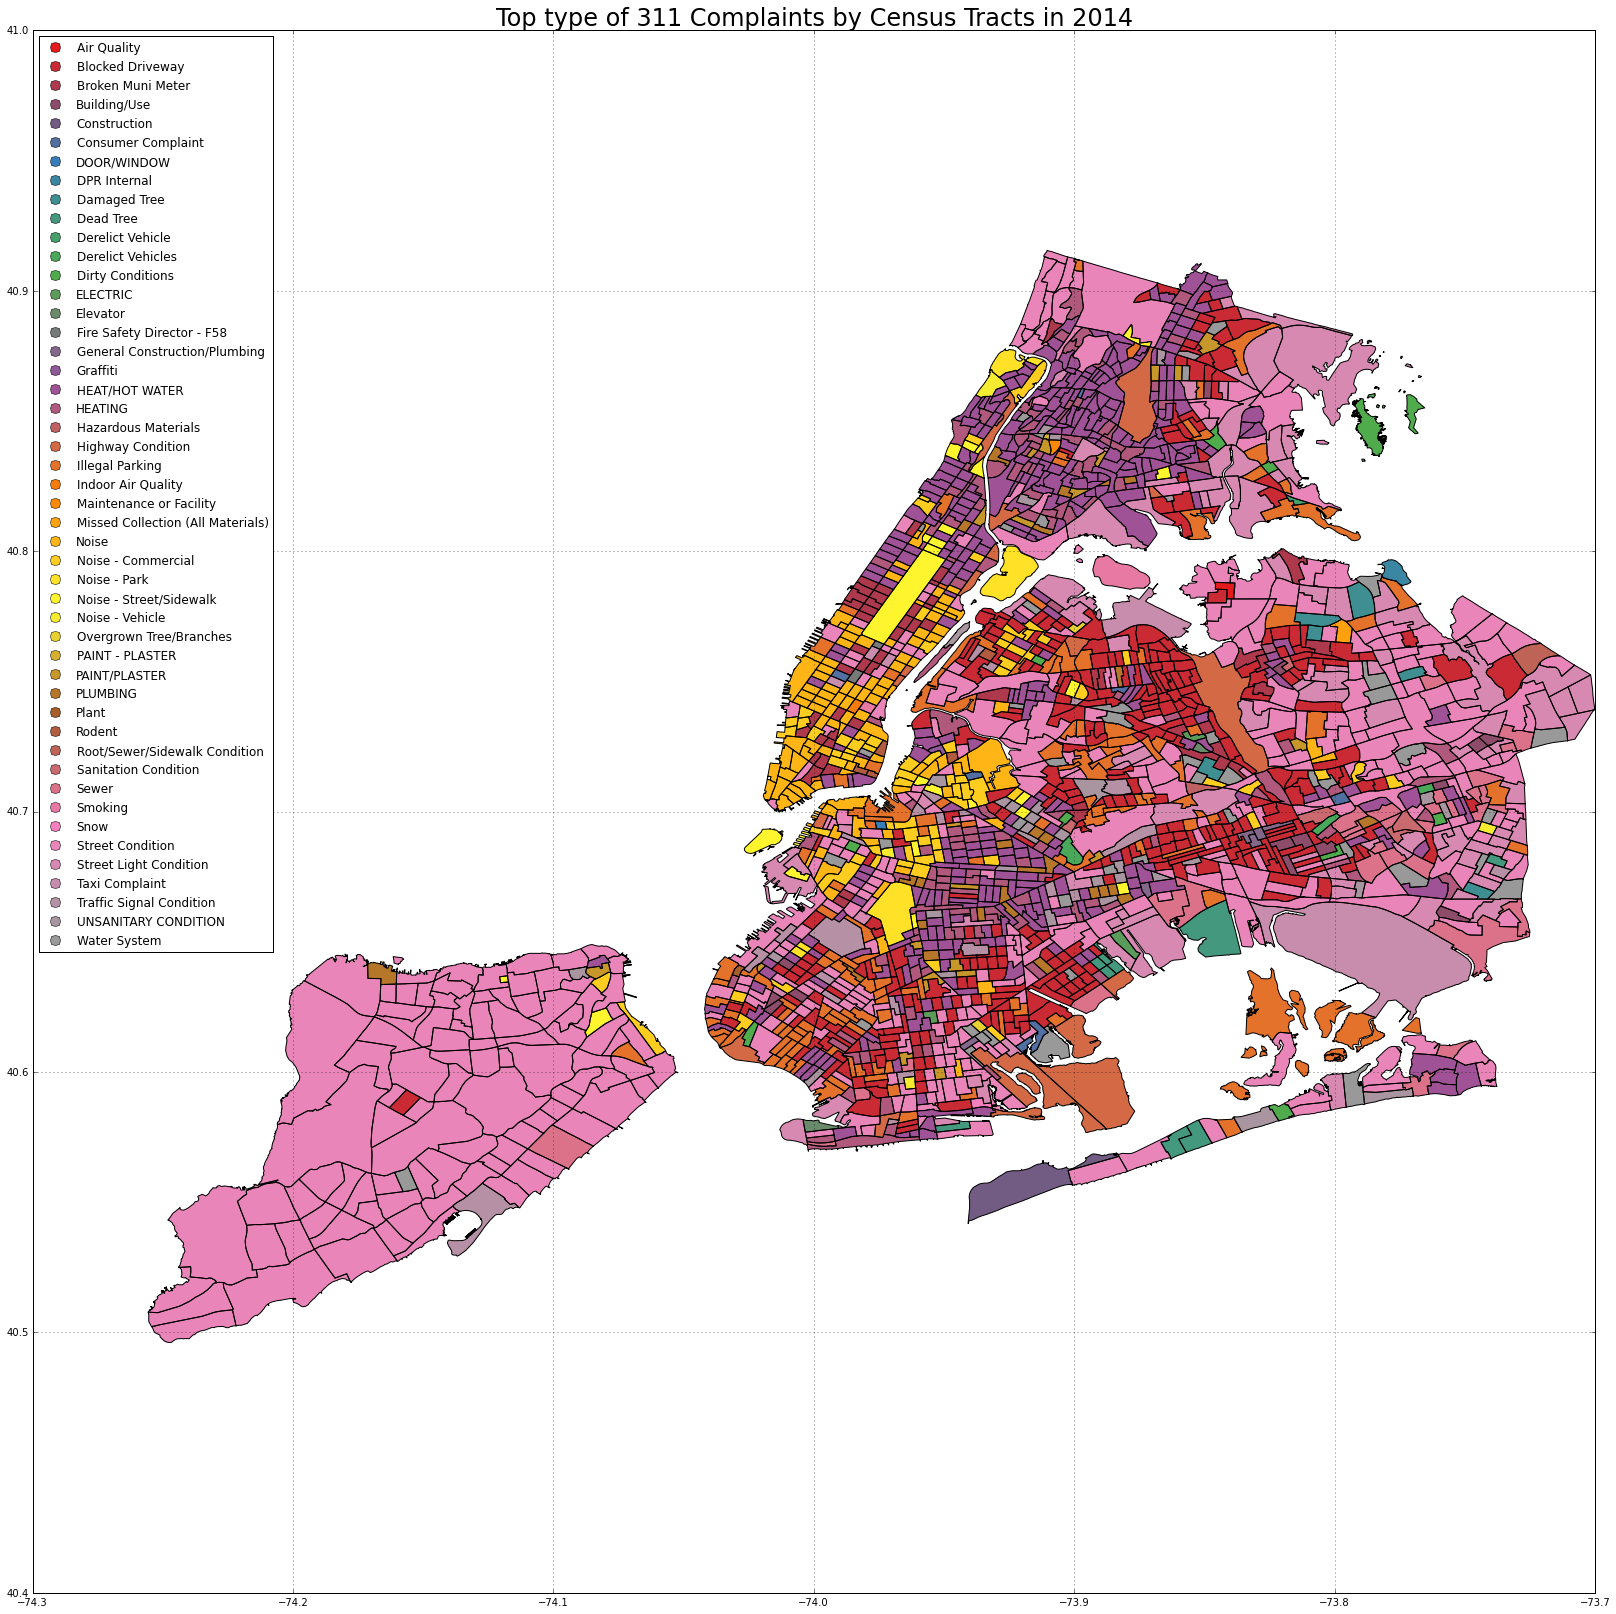

In [28]:
plt.figure()
geotopct.plot(column='Complaint Type', alpha=1, legend=True, figsize = (28,50))
plt.title("Top type of 311 Complaints by Census Tracts in 2014", fontsize=24)
plt.grid()

In [29]:
mergedhh = merged[merged['Complaint Type']=='HEAT/HOT WATER']

In [30]:
tophh = pd.DataFrame(mergedhh['Complaint Type'].groupby(mergedhh['BoroCT2010']).value_counts()).reset_index()

In [31]:
tophh.columns = [['BoroCT2010', 'Complaint Type', 'Count']]

In [44]:
geotophh = pd.merge(tracts, tophh, on='BoroCT2010', how='left')

In [58]:
geotophh['Count'] = geotophh['Count'].fillna(0)

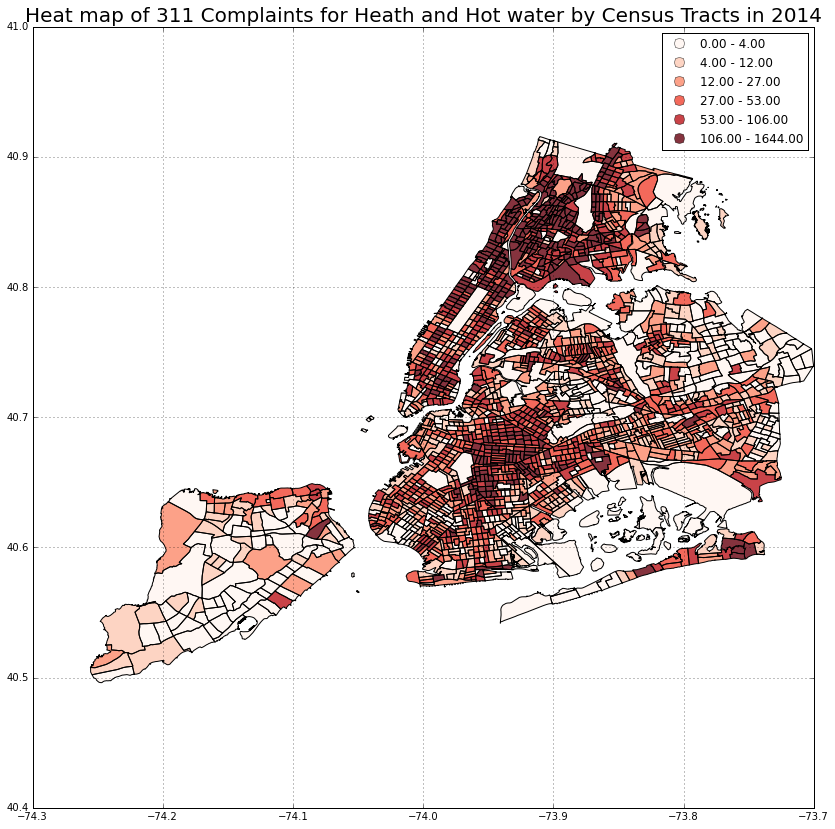

In [65]:
plt.figure()
geotophh.plot(column='Count', alpha=0.8, scheme = 'QUANTILES', k=6, colormap='Reds', figsize = (14,25), legend=True)
plt.grid()
plt.title("Heat map of 311 Complaints for Heath and Hot water by Census Tracts in 2014", fontsize=20)

In [66]:
mergedsc = merged[merged['Complaint Type']=='Street Condition']

In [67]:
topsc = pd.DataFrame(mergedsc['Complaint Type'].groupby(mergedsc['BoroCT2010']).value_counts()).reset_index()

In [68]:
topsc.columns = [['BoroCT2010', 'Complaint Type', 'Count']]

In [69]:
geotopsc = pd.merge(tracts, topsc, on='BoroCT2010', how='left')

In [70]:
geotopsc['Count'] = geotopsc['Count'].fillna(0)

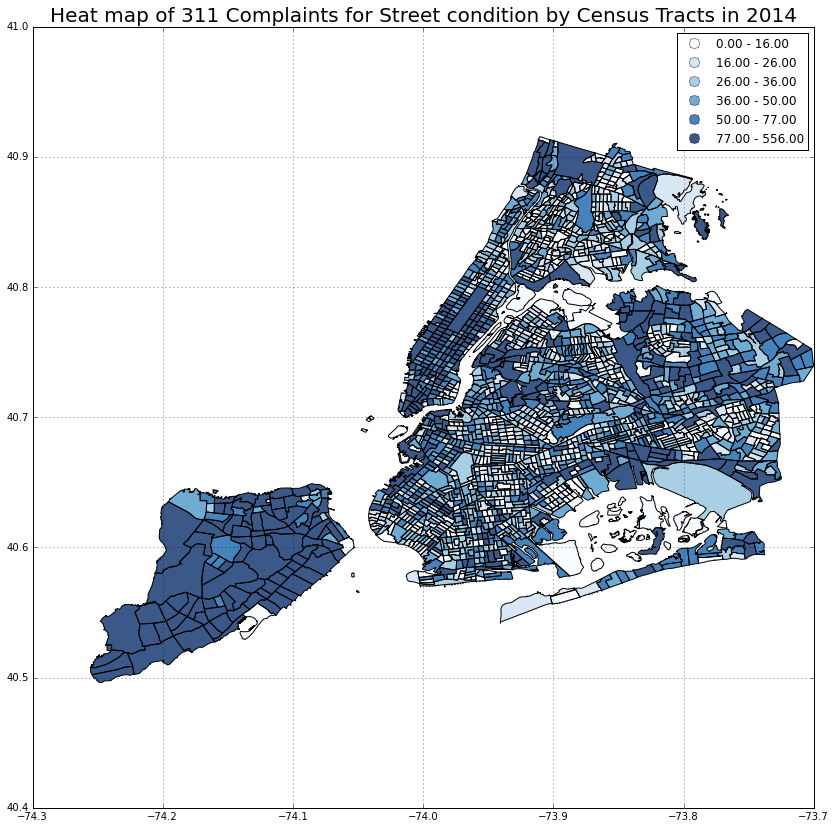

In [80]:
plt.figure()
geotopsc.plot(column='Count', alpha=0.8, scheme = 'QUANTILES', k=6, colormap='Blues', figsize = (14,25), legend=True)
plt.grid()
plt.title("Heat map of 311 Complaints for Street condition by Census Tracts in 2014", fontsize=20)

In [72]:
mergedbd = merged[merged['Complaint Type']=='Blocked Driveway']

In [73]:
topbd = pd.DataFrame(mergedbd['Complaint Type'].groupby(mergedbd['BoroCT2010']).value_counts()).reset_index()

In [74]:
topbd.columns = [['BoroCT2010', 'Complaint Type', 'Count']]

In [75]:
geotobd = pd.merge(tracts, topbd, on='BoroCT2010', how='left')

In [76]:
geotobd['Count'] = geotobd['Count'].fillna(0)

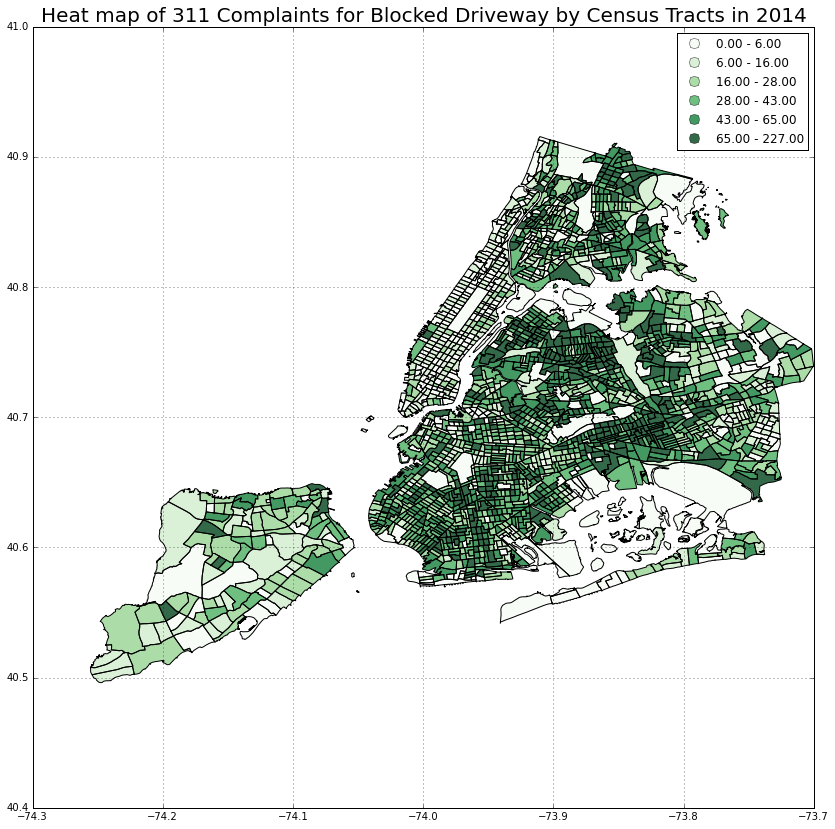

In [79]:
plt.figure()
geotobd.plot(column='Count', alpha=0.8, scheme = 'QUANTILES', k=6, figsize = (14,25), colormap='Greens', legend=True)
plt.grid()
plt.title("Heat map of 311 Complaints for Blocked Driveway by Census Tracts in 2014", fontsize=20)